In [1]:
import math

# produce random numbers
import random

# enable json file loading
import json

# date and time
from datetime import timedelta

# to get web content
from urllib.request import urlopen

 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# advance plotting
import seaborn as sns

# for interactive vizzes
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
# pip list

In [ ]:
# pip install plotly==4.8.2

In [ ]:
# pip install us

In [ ]:
# pip install calmap

In [ ]:
# pip install pycountry_convert

In [2]:
cnf, dth, rec, act = "#393e46","#ff2e63", "#21bf73", "#fe9801"

In [3]:
full_data=pd.read_csv("/Users/homeoffice/projectsTech/covid_19_clean_complete.csv")
full_data.sample(10)

Province/State Country/Region        Lat        Long  \
14249                        NaN      Mauritius -20.200000   57.500000   
38284                        NaN       Paraguay -23.442500  -58.443800   
37367               Saskatchewan         Canada  52.939900 -106.450900   
28851                        NaN    South Korea  36.000000  128.000000   
24483                        NaN        Tunisia  34.000000    9.000000   
7082                     Alberta         Canada  53.933300 -116.576500   
22192                        NaN        Armenia  40.069100   45.038200   
40425                        NaN     Mozambique -18.665695   35.529562   
34070                        NaN          Kenya  -0.023600   37.906200   
10479  Newfoundland and Labrador         Canada  53.135500  -57.660400   

             Date  Confirmed  Deaths  Recovered  Active             WHO Region  
14249  2020-03-16          0       0          0       0                 Africa  
38284  2020-06-16       1303      13        699     591               Americas  
37367  2020-06-13        664      13          0     651               Americas  
28851  2020-05-11      10936     258       9670    1008        Western Pacific  
24483  2020-04-24        922      38        194     690  Eastern Mediterranean  
7082   2020-02-18          0       0          0       0               Americas  
22192  2020-04-16       1159      18        358     783                 Europe  
40425  2020-06-24        762       5          0     757                 Africa  
34070  2020-05-31       1962      64        478    1420                 Africa  
10479  2020-03-02          0       0          0       0               Americas

In [4]:
full_grouped=pd.read_csv("/Users/homeoffice/projectsTech/full_grouped.csv")
full_grouped['Date'] = pd.to_datetime(full_grouped['Date'])
day_wise=pd.read_csv("/Users/homeoffice/projectsTech/day_wise.csv")
day_wise['Date']=pd.to_datetime(day_wise['Date'])
country_wise = pd.read_csv("/Users/homeoffice/projectsTech/country_wise_latest.csv")

In [5]:
temp=day_wise[['Date','Deaths','Recovered','Recovered','Active']].sample(20)
temp

Date  Deaths  Recovered  Recovered   Active
16  2020-02-07     719       2011       2011    31600
146 2020-06-16  443669    3892350    3892350  3837808
32  2020-02-23    2466      23391      23391    52410
68  2020-03-30   39593     163231     163231   580029
9   2020-01-31     213        222        222     9492
113 2020-05-14  302797    1547261    1547261  2600327
105 2020-05-06  264180    1212442    1212442  2283473
95  2020-04-26  210176     827517     827517  1919920
37  2020-02-28    2866      36695      36695    43804
123 2020-05-24  345396    2119105    2119105  2952112
129 2020-05-30  369476    2511531    2511531  3189136
144 2020-06-14  433375    3715556    3715556  3763080
124 2020-05-25  346567    2182155    2182155  2974861
64  2020-03-26   24789     121352     121352   383272
149 2020-06-19  460252    4184852    4184852  4025106
29  2020-02-20    2245      18175      18175    55143
12  2020-02-03     426        623        623    18832
127 2020-05-28  360670    2365296    2365296  3093546
31  2020-02-22    2456      22882      22882    52600
87  2020-04-18  163436     579337     579337  1573081

In [6]:
temp=temp.melt(id_vars='Date',value_vars=['Active','Deaths','Recovered'])
temp

Date   variable    value
0  2020-02-07     Active    31600
1  2020-06-16     Active  3837808
2  2020-02-23     Active    52410
3  2020-03-30     Active   580029
4  2020-01-31     Active     9492
..        ...        ...      ...
75 2020-02-20  Recovered    18175
76 2020-02-03  Recovered      623
77 2020-05-28  Recovered  2365296
78 2020-02-22  Recovered    22882
79 2020-04-18  Recovered   579337

[80 rows x 3 columns]

In [7]:
fig=px.treemap(temp,path=["variable"],values="value",height=225,
               color_discrete_sequence=[act, rec, dth])

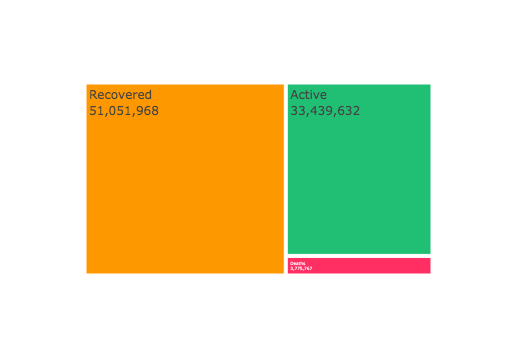

In [8]:
fig.data[0].textinfo='label+text+value'
fig.show()

In [9]:
# function to draw heatmap
def plot_map(df,col,pal):
    df=df[df[col]>0]
    fig=px.choropleth(df,locations='Country/Region',locationmode='country names',
                    color=col,hover_name='Country/Region',
                    title=col,hover_data=[col],color_continuous_scale=pal)
    fig.show()

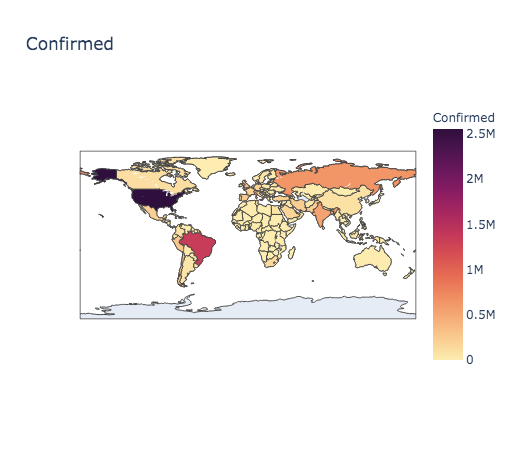

In [10]:
# plot heatmap of confirmed cases
plot_map(country_wise,'Confirmed','matter')

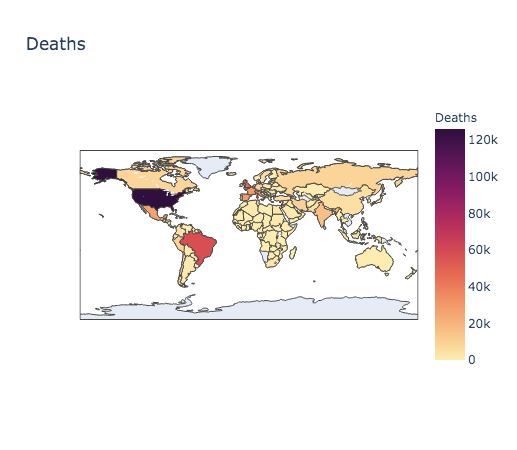

In [11]:
# plot heatmap of death cases
plot_map(country_wise,'Deaths','matter')

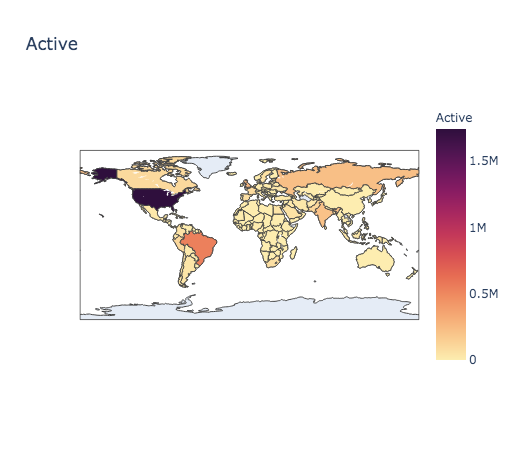

In [12]:
# plot heatmap of active cases
plot_map(country_wise,'Active','matter')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning:

divide by zero encountered in log



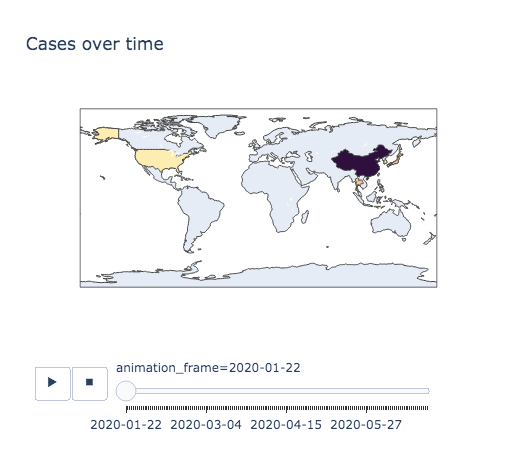

In [13]:
fig=px.choropleth(full_grouped,locations="Country/Region",
                 color=np.log(full_grouped["Confirmed"]),
                locationmode='country names',hover_name='Country/Region',
                 animation_frame=full_grouped["Date"].dt.strftime('%Y-%m-%d'),
                title='Cases over time',color_continuous_scale=px.colors.sequential.matter)
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [14]:
def plot_hbar(df,col,n,hover_data=[]):
    fig=px.bar(df.sort_values(col).tail(n),
              x=col,y='Country/Region',color="WHO Region",
              text=col,orientation='h', width=700, hover_data=hover_data,
               color_discrete_sequence=px.colors.qualitative.Dark2)
    fig.update_layout(title=col,xaxis_title="",yaxis_title="",
                     yaxis_categoryorder='total ascending',
                      uniformtext_minsize=8,uniformtext_mode='hide')
    fig.show()

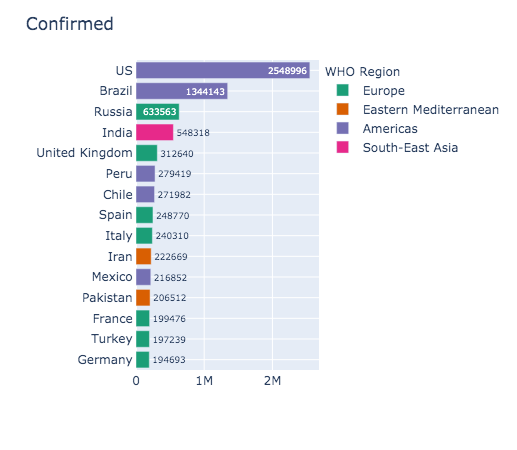

In [15]:
plot_hbar(country_wise,'Confirmed',15)

In [16]:
# none of the figures were showing up so trying these steps below:

In [ ]:
pip install jupyterlab "ipywidgets>=7.5"

In [ ]:
jupyter labextension install jupyterlab-plotly@4.8.2

In [ ]:
jupyter labextension install jupyterlab-plotly@4.8.2

In [ ]:
python --version

In [ ]:
sys.version

In [ ]:
import sys
sys.version

In [ ]:
# testing graphing
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()
# still not working but have the labextension command still running on terminal, not done yet
# will test again upon completion

In [ ]:
# testing graphing upon completion
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.show()